# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [60]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [61]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [62]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration
# Analysis
As I can see from the data info, there are 18442 datasets, all features contain data

In [63]:
print(X.columns)
# Split data into numerical, categorical and text features
numerical_features = [
    'Positive Feedback Count']
print('Numerical features:', numerical_features)

categorical_features = [
    'Clothing ID',
    'Age',
    'Division Name',
    'Department Name',
    'Class Name',
] 
print('categorical_features:', categorical_features)

text_features = [
    'Title',
    'Review Text',
    ]
print('text_features:', text_features)

# amount of training data
print('-----')
print((X_train.shape[0]/X.shape[0]) * 100, '% of the data is used for training')

# amount of data in each category
print('-----')
print('Amount of data in each category:')
for col in categorical_features:
    print(col, ':')
    print(X_train[col].value_counts())
    print()
#print(X_train.value_counts(normalize=True) * 100)


Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Positive Feedback Count',
       'Division Name', 'Department Name', 'Class Name'],
      dtype='object')
Numerical features: ['Positive Feedback Count']
categorical_features: ['Clothing ID', 'Age', 'Division Name', 'Department Name', 'Class Name']
text_features: ['Title', 'Review Text']
-----
89.99566207569679 % of the data is used for training
-----
Amount of data in each category:
Clothing ID :
Clothing ID
1078    792
862     594
1094    590
1081    437
829     415
       ... 
620       1
7         1
924       1
541       1
1186      1
Name: count, Length: 520, dtype: int64

Age :
Age
39    930
35    593
38    560
34    547
36    546
     ... 
99      1
87      1
86      1
92      1
94      1
Name: count, Length: 76, dtype: int64

Division Name :
Division Name
General           10497
General Petite     6100
Name: count, dtype: int64

Department Name :
Department Name
Tops        7818
Dresses     4845
Bottoms     2852
Jackets     

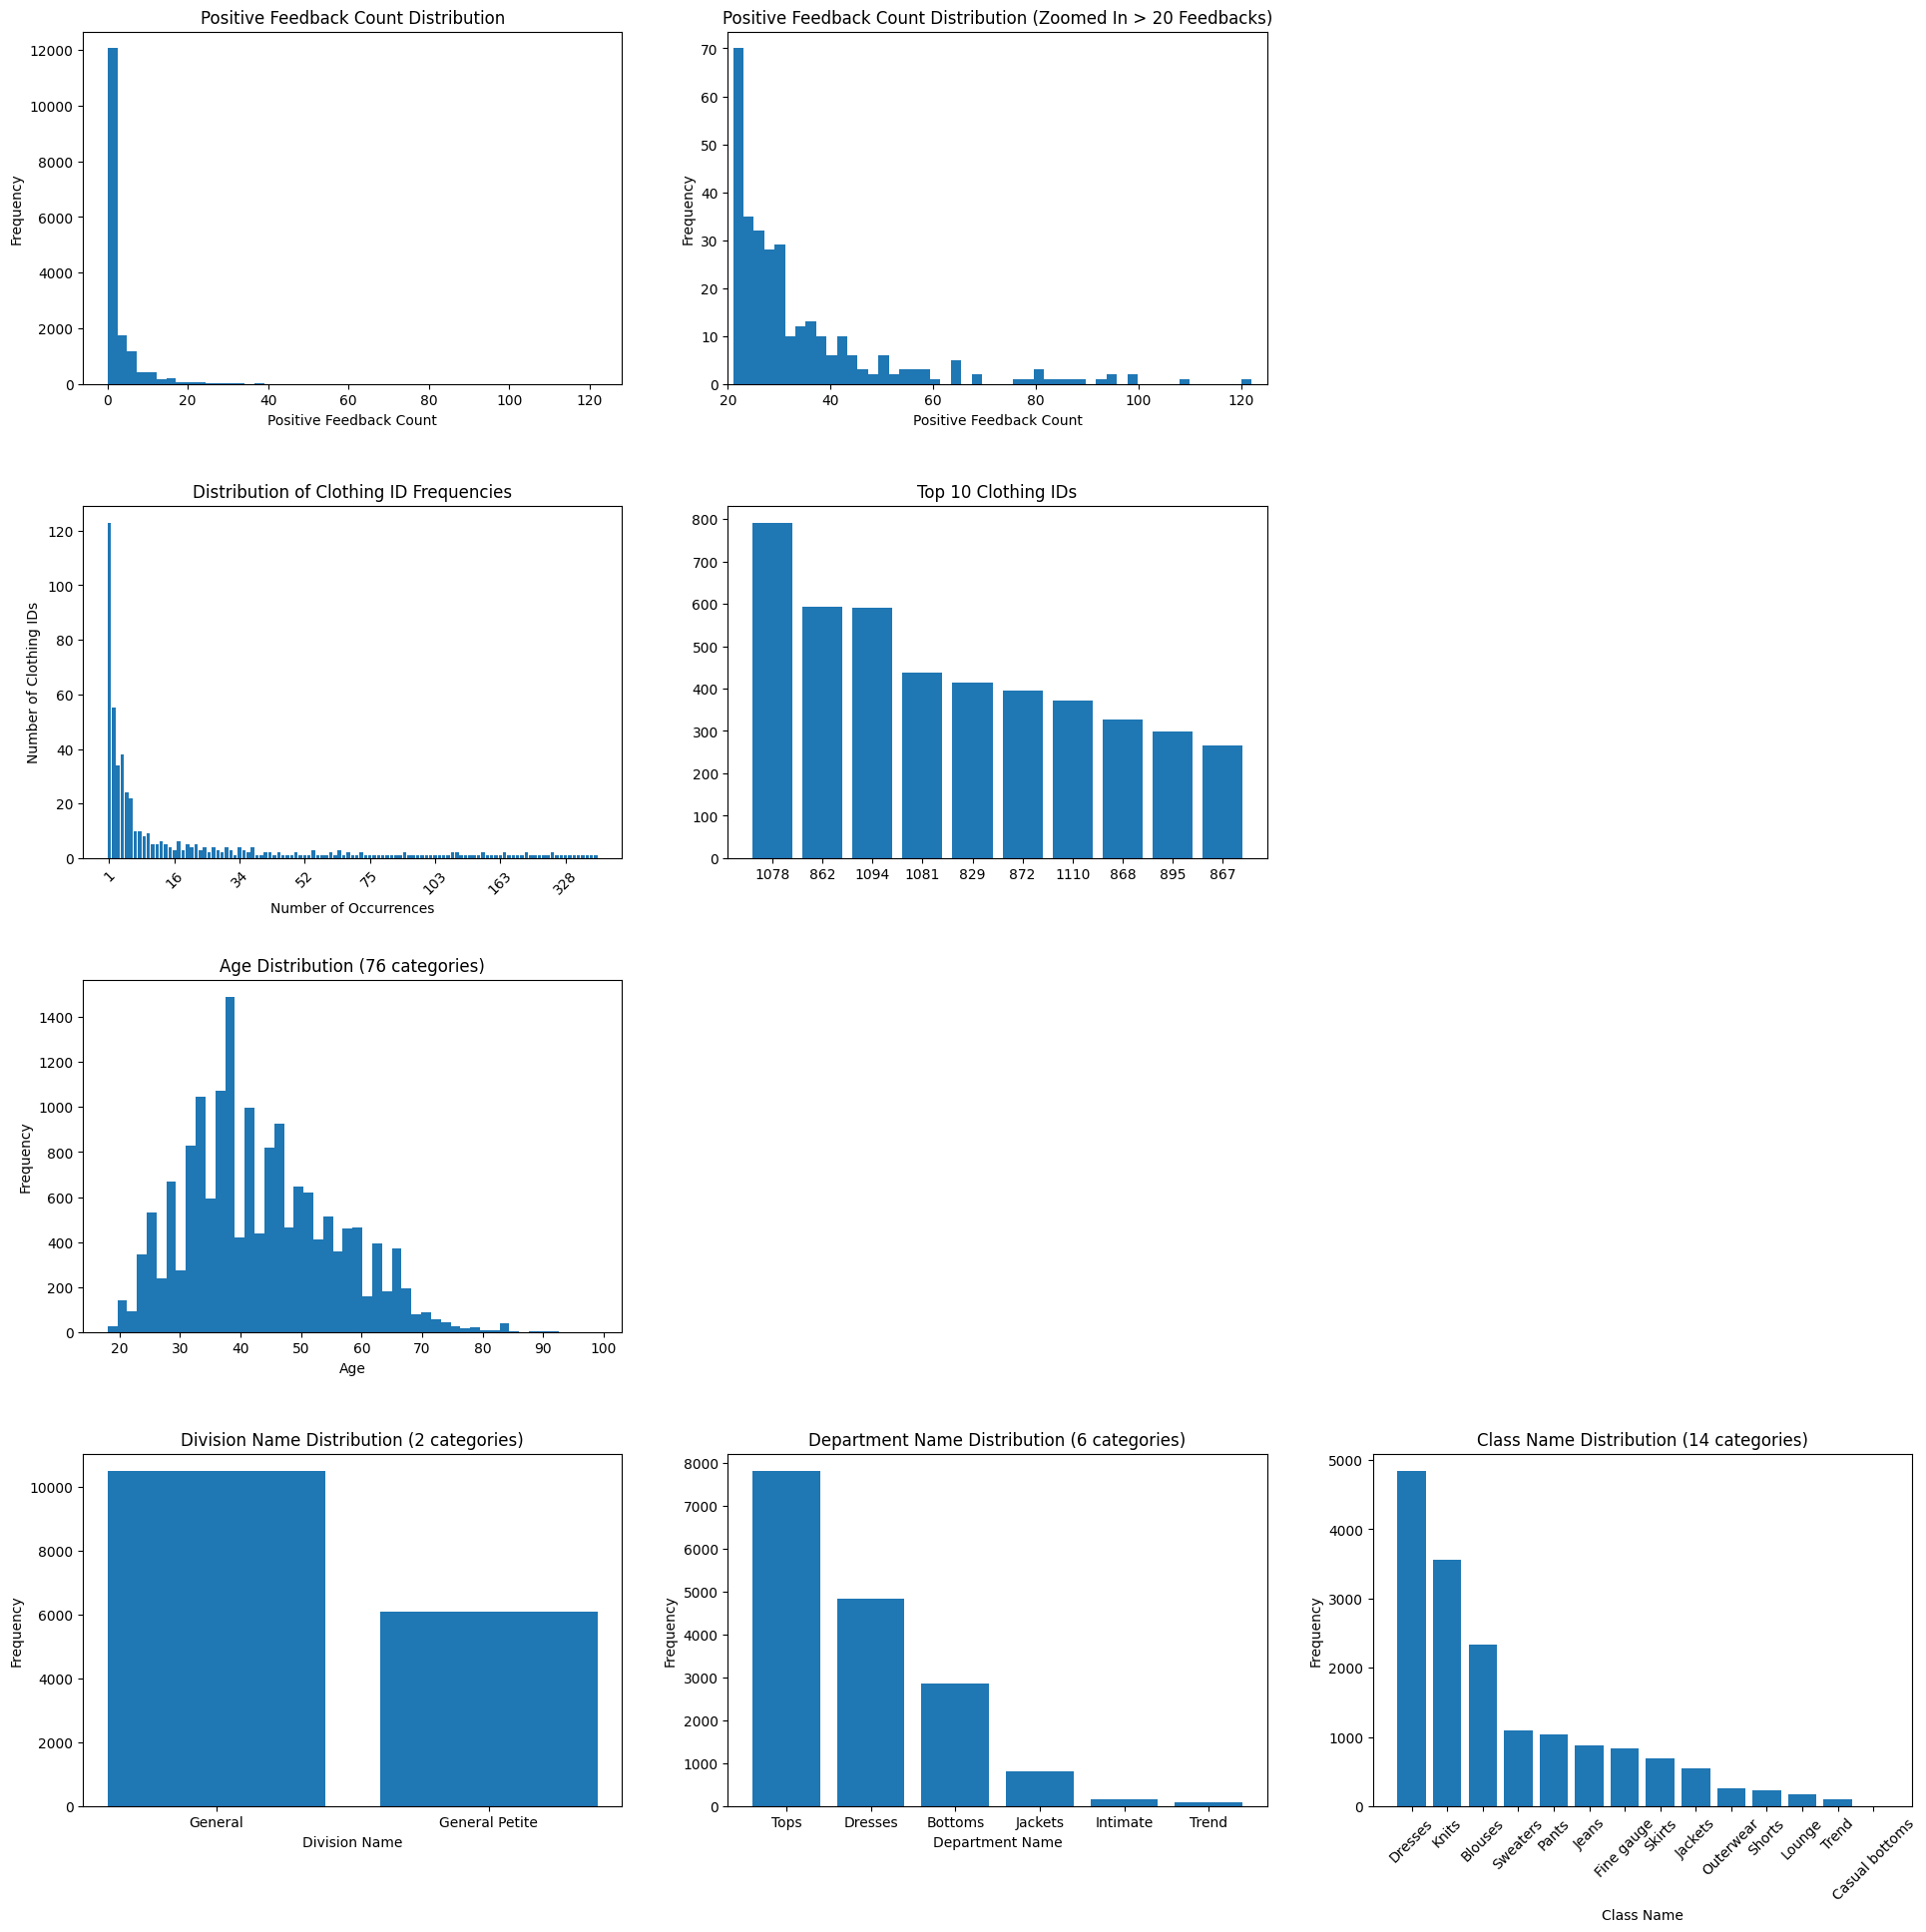

In [64]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np

fig, ax = plt.subplots(4, 3, figsize=(20, 20))

# Plotting numerical features (histograms)
ax[0, 0].hist(X_train['Positive Feedback Count'], bins=50)
ax[0, 0].set_title('Positive Feedback Count Distribution')
ax[0, 0].set_xlabel('Positive Feedback Count')
ax[0, 0].set_ylabel('Frequency')

ax[0, 1].hist(X_train[X_train['Positive Feedback Count'] > 20]['Positive Feedback Count'], bins=50)
ax[0, 1].set_title('Positive Feedback Count Distribution (Zoomed In > 20 Feedbacks)')
ax[0, 1].set_xlim(20, 125)
ax[0, 1].set_xlabel('Positive Feedback Count')
ax[0, 1].set_ylabel('Frequency')

# hide non-used subplots
ax[0, 2].axis('off')

# Plotting categorical features (bar plots)

# Clothing ID
clothing_freq_of_freq = X_train['Clothing ID'].value_counts().value_counts().sort_index()
ax[1, 0].bar(clothing_freq_of_freq.index.astype(str), clothing_freq_of_freq.values)
ax[1, 0].set_title('Distribution of Clothing ID Frequencies')
ax[1, 0].set_xlabel('Number of Occurrences')
ax[1, 0].set_ylabel('Number of Clothing IDs')
plt.setp(ax[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='center')
ax[1,0].xaxis.set_major_locator(ticker.MaxNLocator(10))

# Nur die Top 10 häufigsten Clothing IDs anzeigen
top_clothing = X_train['Clothing ID'].value_counts().nlargest(10)
ax[1, 1].bar(top_clothing.index.astype(str), top_clothing.values)
ax[1, 1].set_title('Top 10 Clothing IDs')

ax[1,2].axis('off')

# Plotting Age (histogram)
ax[2, 0 ].hist(X_train['Age'], bins=50)
ax[2, 0].set_title(f'Age Distribution ({len(X_train["Age"].value_counts())} categories)')
ax[2, 0].set_xlabel('Age')
ax[2, 0].set_ylabel('Frequency')

ax[2,1].axis('off')
ax[2,2].axis('off')

# Division Name
division_counts = X_train['Division Name'].value_counts()
ax[3, 0].bar(division_counts.index, division_counts.values)
ax[3, 0].set_title(f'Division Name Distribution ({len(division_counts)} categories)')
ax[3, 0].set_xlabel('Division Name')
ax[3, 0].set_ylabel('Frequency')

# Department Name
dept_counts = X_train['Department Name'].value_counts()
ax[3, 1].bar(dept_counts.index, dept_counts.values)
ax[3, 1].set_title(f'Department Name Distribution ({len(dept_counts)} categories)')
ax[3, 1].set_xlabel('Department Name')
ax[3, 1].set_ylabel('Frequency')


# Class Name
class_counts = X_train['Class Name'].value_counts()
ax[3, 2].bar(class_counts.index, class_counts.values)
ax[3, 2].set_title(f'Class Name Distribution ({len(class_counts)} categories)')
ax[3, 2].set_xlabel('Class Name')
ax[3, 2].set_ylabel('Frequency')
plt.setp(ax[3, 2].xaxis.get_majorticklabels(), rotation=45, ha='center')


# Anpassen des Layouts mit mehr Platz für die gedrehten Labels
plt.tight_layout(pad=3.0)


## Building Pipeline

### Numerical Feature Pipeline
- relace missing values (there should be no missing values)
- normalize the numerical data

In [65]:
# pepare numerical feature
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    (
        'imputer',
        SimpleImputer(strategy='mean'),
    ),
    (
        'scaler',
        MinMaxScaler(),
    ),
])

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

### Categorial Feature Pipeline
- encode categorical features as an integer array.
- relace missing values (there should be no missing values)
- encode categorical features as a one-hot numeric array.

In [66]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    (
        'ordinal_encoder',
        OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
        )
    ),    
    (
        'imputer',
        SimpleImputer(
            strategy='most_frequent',
        )
    ),
    (
        'cat_encoder',
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        )
    ),
])

cat_pipeline

Pipeline(steps=[('ordinal_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### text feature pipeline
we have the following featurws here:
- Title
- Review Text

In [67]:
import spacy
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

# make sure spacy is ready to use
! python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# first create a custom trasnformer to extract text features
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lemmatized = [
            ' '.join(
                token.lemma_ for token in doc
                if not token.is_stop
            )
            for doc in self.nlp.pipe(X)
        ]
        return lemmatized   

# prepare pipeline for text features
tfidf_pipeline = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
    (
        'lemmatizer',
        SpacyLemmatizer(nlp=nlp),
    ),
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            stop_words='english',
        ),
    ),
])

tfidf_pipeline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Pipeline(steps=[('dimension_reshaper',
                 FunctionTransformer(func=<function reshape at 0x110b01f30>,
                                     kw_args={'newshape': -1})),
                ('lemmatizer',
                 SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x4199e2dd0>)),
                ('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))])

In [69]:
from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features),
        ('tfidf_text_title', tfidf_pipeline, ['Title']),
        ('tfidf_text_review', tfidf_pipeline, ['Review Text']),
])

feature_engineering

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Positive Feedback Count']),
                                ('cat',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='igno...
                                                  TfidfVectorizer(stop_words='english'))]),
                                 ['Title']),
                                ('tfidf_text_review',
                                 Pipeline(steps=[('dimension_reshaper',
                                                  FunctionTransformer(func=<function reshape at 0x110b01f30>,
                                                                      kw_args={'newshape': -1})),
                                                 ('lemmatizer',
                                                  SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x4199e2dd0>)),
                                                 ('tfidf_vectorizer',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 ['Review Text'])])

## Training Pipeline

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

model_pipeline = make_pipeline(
    feature_engineering,
    RandomForestClassifier(random_state=27),
)

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encode...
                                                 ('tfidf_text_review',
                                                  Pipeline(steps=[('dimension_reshaper',
                                                                   FunctionTransformer(func=<function reshape at 0x110b01f30>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x4199e2dd0>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  ['Review Text'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=27))])

### Evaluate Model


In [71]:
from sklearn.metrics import accuracy_score

y_pred_forest_pipeline = model_pipeline.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

Accuracy: 0.8482384823848238


## Fine-Tuning Pipeline